In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
from keras.models import load_model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df_slice = pd.read_csv('../Dataset/Normalisasi/processed_dataset_slice_norm.csv',sep=',')

In [3]:
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,0.647059,0.055556,0.0,0.000640
1,0.705882,0.333333,0.5,0.081254
2,0.882353,0.555556,0.0,0.000534
3,0.941176,0.833333,0.5,0.014585
4,0.647059,0.111111,1.0,0.618070


## Load Model

In [4]:
lstm_model = load_model('lstm_slice.h5')
lstm_model

In [5]:
x_train,x_test,y_train,y_test = train_test_split(slice_x,slice_y,test_size=0.30,random_state=9)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(50540, 4, 1)

In [6]:
lstm_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1580/1580 [==============================] - 10s 5ms/step - loss: 0.2371 - accuracy: 0.8726 - mean_squared_error: 0.4190 - mean_absolute_error: 0.5000
Epoch 2/10
1580/1580 [==============================] - 9s 6ms/step - loss: 0.2382 - accuracy: 0.8726 - mean_squared_error: 0.4195 - mean_absolute_error: 0.5000A: 4s - loss: 0.237
Epoch 3/10
1580/1580 [==============================] - 9s 6ms/step - loss: 0.2355 - accuracy: 0.8738 - mean_squared_error: 0.4201 - mean_absolute_error: 0.5000
Epoch 4/10
1580/1580 [==============================] - 9s 6ms/step - loss: 0.2353 - accuracy: 0.8733 - mean_squared_error: 0.4200 - mean_absolute_error: 0.5000
Epoch 5/10
1580/1580 [==============================] - 9s 6ms/step - loss: 0.2336 - accuracy: 0.8751 - mean_squared_error: 0.4207 - mean_absolute_error: 0.5000
Epoch 6/10
1580/1580 [==============================] - 9s 6ms/step - loss: 0.2318 - accuracy: 0.8753 - mean_squared_error: 0.4214 - mean_absolute_error: 0.5000
Epoch 7/10
158

In [7]:
y_pred_train = lstm_model.predict(x_train)
y_pred_train

array([[9.9007052e-01, 9.9294689e-03],
       [9.8029459e-01, 1.9705463e-02],
       [4.4106574e-08, 1.0000000e+00],
       ...,
       [9.0459980e-05, 9.9990952e-01],
       [1.2790571e-01, 8.7209433e-01],
       [2.8169827e-06, 9.9999714e-01]], dtype=float32)

In [13]:
y_pred_train_1 = [x[0] for x in y_pred_train]
y_pred_train_2 = [x[1] for x in y_pred_train]


In [14]:
df_x_train = x_train_awal
df_x_train['lstm_result_1'] = y_pred_train_1
df_x_train['lstm_result_2'] = y_pred_train_2
df_x_train['label'] = y_train
df_x_train

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,dst,src,Protocol,bytecount,lstm_result_1,lstm_result_2,label
52757,0.882353,0.000000,1.0,0.532565,9.900705e-01,9.929469e-03,0
28936,0.941176,0.111111,1.0,0.848030,9.802946e-01,1.970546e-02,0
17678,0.882353,0.555556,0.0,0.562899,4.410657e-08,1.000000e+00,1
54228,0.705882,0.111111,0.5,0.068673,1.428861e-01,8.571139e-01,0
16503,0.882353,0.166667,0.0,0.000123,1.000000e+00,2.996881e-08,0
...,...,...,...,...,...,...,...
42747,0.647059,0.111111,1.0,0.976527,3.769588e-01,6.230412e-01,1
22584,0.000000,0.888889,0.0,0.000423,9.999988e-01,1.243259e-06,0
65462,0.941176,0.055556,1.0,0.241881,9.045998e-05,9.999095e-01,1
66037,0.941176,0.722222,0.5,0.068629,1.279057e-01,8.720943e-01,0


In [16]:
y_test_pred = lstm_model.predict(x_test)
y_test_pred_1 = [x[0] for x in y_test_pred]
y_test_pred_2 = [x[1] for x in y_test_pred]

y_test_pred

array([[4.3386766e-01, 5.6613243e-01],
       [9.6373427e-01, 3.6265716e-02],
       [1.2764273e-10, 1.0000000e+00],
       ...,
       [1.0000000e+00, 7.9947082e-10],
       [1.4909260e-14, 1.0000000e+00],
       [1.0000000e+00, 4.8726564e-11]], dtype=float32)

In [17]:
df_x_test = x_test_awal
df_x_test['lstm_result_1'] = y_test_pred_1
df_x_test['lstm_result_2'] = y_test_pred_2
df_x_test['label'] = y_test
df_x_test

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,dst,src,Protocol,bytecount,lstm_result_1,lstm_result_2,label
11713,0.764706,0.555556,1.0,0.477935,4.338677e-01,5.661324e-01,0
52924,0.647059,0.388889,0.5,0.105974,9.637343e-01,3.626572e-02,0
4045,0.647059,0.055556,0.0,0.826409,1.276427e-10,1.000000e+00,1
54476,0.294118,1.000000,0.0,0.000046,9.999999e-01,6.661717e-08,0
19341,0.647059,0.111111,1.0,0.977027,3.768392e-01,6.231608e-01,1
...,...,...,...,...,...,...,...
21721,0.176471,0.777778,0.0,0.000421,1.000000e+00,2.849358e-09,0
55392,0.941176,0.000000,1.0,0.717873,9.900705e-01,9.929469e-03,0
30108,0.941176,0.888889,0.0,0.000481,1.000000e+00,7.994708e-10,0
49565,0.176471,0.888889,0.0,0.263331,1.490926e-14,1.000000e+00,1


In [18]:
df_x_train.to_csv('data_latih.csv', sep=',', index=False)
df_x_test.to_csv('data_test.csv',sep=',', index=False)

## Naive Bayes Model

In [19]:
nb_classifier = GaussianNB()
nb_classifier


GaussianNB()

In [20]:
df_train = pd.read_csv('data_latih.csv', sep=',')
df_test = pd.read_csv('data_test.csv', sep=',')

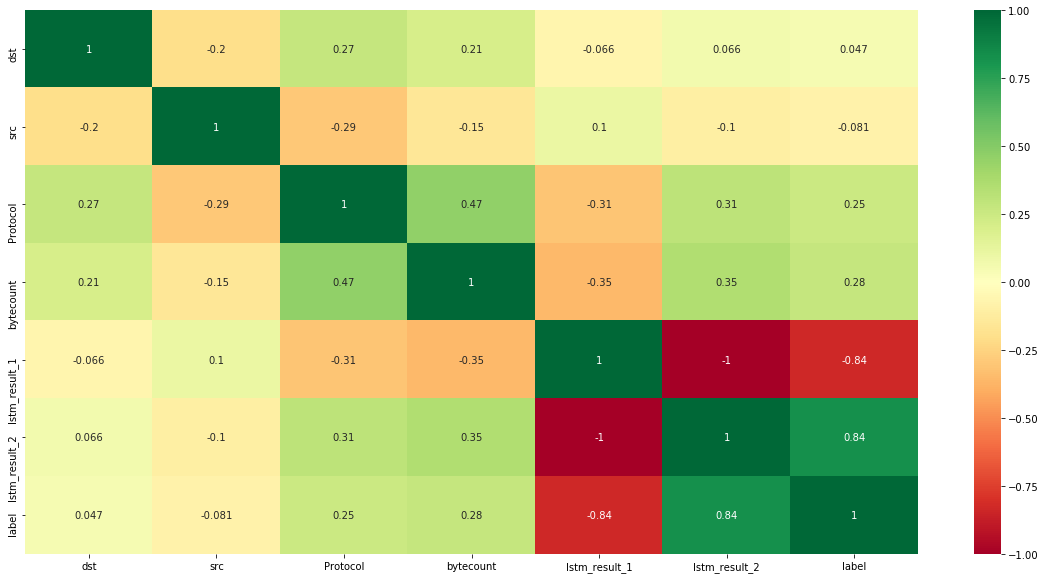

In [21]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [23]:
x_train = df_train[['Protocol', 'lstm_result_1','lstm_result_2']]
y_train = df_train['label']

x_test = df_test[['Protocol', 'lstm_result_1','lstm_result_2']]
y_test = df_test['label']

In [24]:
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [25]:
train_pred = nb_classifier.predict(x_train)
test_pred = nb_classifier.predict(x_test)

In [26]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in train_pred]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[30789     0]
 [19751     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     30789
           1       0.00      0.00      0.00     19751

    accuracy                           0.61     50540
   macro avg       0.30      0.50      0.38     50540
weighted avg       0.37      0.61      0.46     50540

Accuracy: 60.9200633161852


In [27]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in test_pred]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[13230     0]
 [ 8431     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     13230
           1       0.00      0.00      0.00      8431

    accuracy                           0.61     21661
   macro avg       0.31      0.50      0.38     21661
weighted avg       0.37      0.61      0.46     21661

Accuracy: 61.07751258021329


In [28]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [29]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

NB_Feature_Grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='accuracy' ,verbose=1, cv=10, n_jobs=1)
NB_Feature_Grid.fit(x_train, y_train)
print(NB_Feature_Grid.best_estimator_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(var_smoothing=0.732596542821523)


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  1.9min finished


In [30]:
print(NB_Feature_Grid.best_score_)

0.8906608626830235


In [31]:
best_estimator = NB_Feature_Grid.best_estimator_
best_estimator

GaussianNB(var_smoothing=0.732596542821523)

In [32]:
#Save Best Estimator 
joblib.dump(best_estimator, 'naive_bayes_final.pkl')

['naive_bayes_final.pkl']

In [33]:
best_nb = best_estimator
train_pred = best_nb.predict(x_train)
test_pred = best_nb.predict(x_test)

In [34]:
print(confusion_matrix(y_train, train_pred))
print(classification_report(y_train, train_pred))
print("Accuracy:",accuracy_score(y_train, train_pred)*100)


[[27505  3284]
 [ 2237 17514]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     30789
           1       0.84      0.89      0.86     19751

    accuracy                           0.89     50540
   macro avg       0.88      0.89      0.89     50540
weighted avg       0.89      0.89      0.89     50540

Accuracy: 89.07597942223981


In [35]:
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print("Accuracy:",accuracy_score(y_test, test_pred)*100)

[[11691  1539]
 [ 1030  7401]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     13230
           1       0.83      0.88      0.85      8431

    accuracy                           0.88     21661
   macro avg       0.87      0.88      0.88     21661
weighted avg       0.88      0.88      0.88     21661

Accuracy: 88.13997507040303
